# Gradient Descent Methods

This tour explores the use of gradient descent method for unconstrained and constrained optimization of a smooth function

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_python/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$


In [1]:
using PyPlot
using NtToolBox
using Autoreload
arequire("NtToolBox")

  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:1
  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:1
  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:7
  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:7
  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:12
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  like

## Gradient Descent for Unconstrained Problems

We consider the problem of finding a minimum of a function $f$, hence solving
$$\umin{x \in \RR^d} f(x)$$
where $f : \RR^d \rightarrow \RR$ is a smooth function.

Note that the minimum is not necessarily unique.
In the general case, $f$ might exhibit local minima, in which case the proposed algorithms is not expected to find a global minimizer of the problem.
In this tour, we restrict our attention to convex function, so that the methods will converge to a global minimizer.

The simplest method is the gradient descent, that computes
$$ x^{(k+1)} = x^{(k)} - \tau_k \nabla f(x^{(k)}), $$
where $\tau_k>0$ is a step size, and $\nabla f(x) \in \RR^d$ is the gradient of $f$ at the point $x$, and $x^{(0)} \in \RR^d$ is any initial point.

In the convex case, if $f$ is of class $C^2$, in order to ensure convergence, the step size should satisfy
$$ 0 < \tau_k < \frac{2}{ \sup_x \norm{Hf(x)} } $$
where $Hf(x) \in \RR^{d \times d}$ is the Hessian of $f$ at $x$ and $\norm{\cdot}$ is the spectral operator norm (largest eigenvalue). 

## Gradient Descent in 2-D

We consider a simple problem, corresponding to the minimization of a 2-D quadratic form
$$ f(x) = \frac{1}{2} \pa{ x_1^2 + \eta x_2^2 } ,$$
where $\eta>0$ controls the anisotropy, and hence the difficulty, of the problem.

Anisotropy parameter $\eta$.

In [17]:
eta = 10

10

Function $f$.

In [18]:
f = x -> ( x[1,1]^2 + eta*x[2, 1]^2 ) / 2

(::#15) (generic function with 1 method)

Background image of the function.

In [19]:
include("ndgrid.jl")
t = linspace(-.7,.7,101)
(u, v) = meshgrid(t,t)
F = ( u .^ 2 + eta .* v .^ 2 ) ./ 2

101×101 Array{Float64,2}:
 2.695    2.6853   2.67579  2.66648  …  2.66648  2.67579  2.6853   2.695  
 2.59798  2.58828  2.57877  2.56946     2.56946  2.57877  2.58828  2.59798
 2.50292  2.49322  2.48371  2.4744      2.4744   2.48371  2.49322  2.50292
 2.40982  2.40012  2.39061  2.3813      2.3813   2.39061  2.40012  2.40982
 2.31868  2.30898  2.29947  2.29016     2.29016  2.29947  2.30898  2.31868
 2.2295   2.2198   2.21029  2.20098  …  2.20098  2.21029  2.2198   2.2295 
 2.14228  2.13258  2.12307  2.11376     2.11376  2.12307  2.13258  2.14228
 2.05702  2.04732  2.03781  2.0285      2.0285   2.03781  2.04732  2.05702
 1.97372  1.96402  1.95451  1.9452      1.9452   1.95451  1.96402  1.97372
 1.89238  1.88268  1.87317  1.86386     1.86386  1.87317  1.88268  1.89238
 1.813    1.8033   1.79379  1.78448  …  1.78448  1.79379  1.8033   1.813  
 1.73558  1.72588  1.71637  1.70706     1.70706  1.71637  1.72588  1.73558
 1.66012  1.65042  1.64091  1.6316      1.6316   1.64091  1.65042  1.66012

1}) in module Main at C:\Users\Ayman\.julia\v0.5\ndgrid.jl:3 overwritten at C:\Users\Ayman\.julia\v0.5\ndgrid.jl:3.


Display the function as a 2-D image.

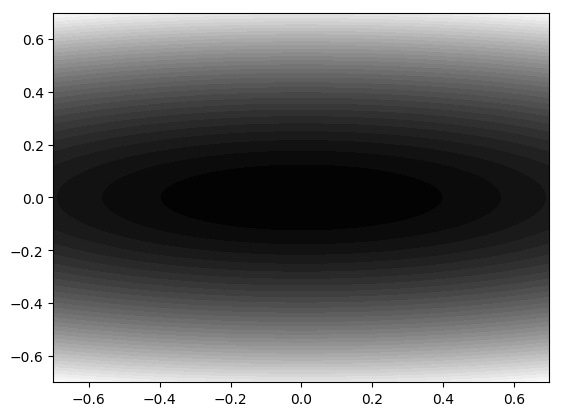

PyObject <matplotlib.contour.QuadContourSet object at 0x0000000025570A20>

In [24]:
contourf(t, t, F, 35) # To check

Gradient.

In [25]:
GradF = x -> [[x[1, 1]],[eta.*x[2, 1]]]

(::#19) (generic function with 1 method)

The step size should satisfy $\tau_k < 2/\eta$.
We use here a constant step size.

In [26]:
tau = 1.8/eta

0.18

_Exercice 1:_
Perform the gradient descent using a fixed step size $\tau_k=\tau$.
Display the decay of the energy $f(x^{(k)})$ through the iteration.
Save the iterates so that |X(:,k)| corresponds to $x^{(k)}$.

In [29]:
## Insert your code here.

Display the iterations.

In [30]:
#contourf(t,t,Jmesh,35)
#plot(X[0,:], X[1,:], 'k.-')

Display the iteration for several different step sizes.

In [31]:
## Insert your code here.

## Gradient and Divergence of Images

Local differential operators like gradient, divergence and laplacian are the building blocks for variational image processing.

Load an image $x_0 \in \RR^N$ of $N=n \times n$ pixels.

In [106]:
n = 256
name = "NtToolBox/src/data/lena.png"
x0 = load_image(name, n)

256×256 Array{Float32,2}:
 0.672897  0.672885  0.672751  0.677479  …  0.705561  0.705635  0.528273
 0.672897  0.672885  0.672751  0.677479     0.705561  0.705635  0.528273
 0.67297   0.672775  0.672727  0.67737      0.704794  0.704138  0.52642 
 0.668169  0.677114  0.668151  0.663225     0.456002  0.30229   0.195605
 0.64486   0.658806  0.663294  0.654061     0.14079   0.126452  0.144403
 0.649533  0.649606  0.649768  0.644331  …  0.162321  0.126224  0.153931
 0.658769  0.654188  0.654389  0.663061     0.112497  0.135866  0.149514
 0.658879  0.663479  0.64497   0.658639     0.134921  0.162588  0.153805
 0.649679  0.644896  0.658947  0.65312      0.140041  0.102623  0.168176
 0.653712  0.662658  0.658682  0.640679     0.125867  0.143843  0.149978
 0.64935   0.644953  0.645078  0.649555  …  0.148765  0.166707  0.162933
 0.662948  0.645294  0.635284  0.649588     0.144277  0.180019  0.174482
 0.649313  0.653241  0.631026  0.663174     0.162496  0.177566  0.173992
 ⋮                       

Display it.

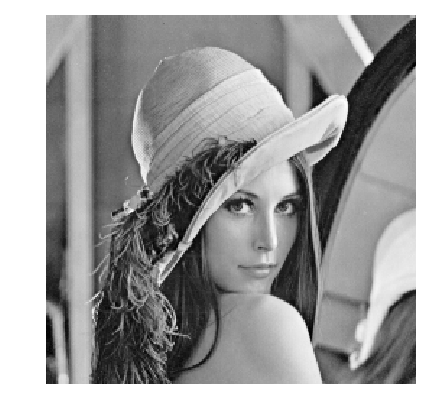

In [13]:
imageplot(x0)

For a continuous function $g$, the gradient reads
$$\nabla g(s) = \pa{ \pd{g(s)}{s_1}, \pd{g(s)}{s_2} } \in \RR^2.$$
(note that here, the variable $d$ denotes the 2-D spacial position).

We discretize this differential operator on a discrete image $x \in \RR^N$ using first order finite differences. 
$$(\nabla x)_i = ( x_{i_1,i_2}-x_{i_1-1,i_2}, x_{i_1,i_2}-x_{i_1,i_2-1} ) \in \RR^2.$$
Note that for simplity we use periodic boundary conditions.

Compute its gradient, using finite differences.

In [58]:
grad = x -> cat(3, x - [x[end, :]'; x[1:end-1, :]], x - [x[:, end] x[:,1:end-1]])


(::#73) (generic function with 1 method)

One thus has $\nabla : \RR^N \mapsto \RR^{N \times 2}.$

In [59]:
v = grad(x0)

256×256×2 Array{Float32,3}:
[:, :, 1] =
  0.556075      0.495078      0.500146     …   0.285185      0.0890486  
  0.0           0.0           0.0              0.0           0.0        
  7.31349f-5   -0.00011003   -2.3663f-5       -0.00149679   -0.00185311 
 -0.00480092    0.0043391    -0.00457609      -0.401849     -0.330814   
 -0.0233096    -0.0183086    -0.00485706      -0.175838     -0.0512026  
  0.00467288   -0.00920004   -0.0135258    …  -0.000227466   0.00952786 
  0.00923604    0.00458217    0.00462097       0.00964157   -0.00441645 
  0.000109732   0.00929147   -0.00941974       0.0267223     0.00429121 
 -0.0091995    -0.0185828     0.0139775       -0.0599653     0.0143704  
  0.00403279    0.017762     -0.000264645      0.04122      -0.0181976  
 -0.00436193   -0.0177056    -0.0136046    …   0.0228644     0.0129545  
  0.013598      0.000341177  -0.00979376       0.0133125     0.0115499  
 -0.0136345     0.00794739   -0.00425839      -0.00245331   -0.000490248
  ⋮        

One can display each of its components.

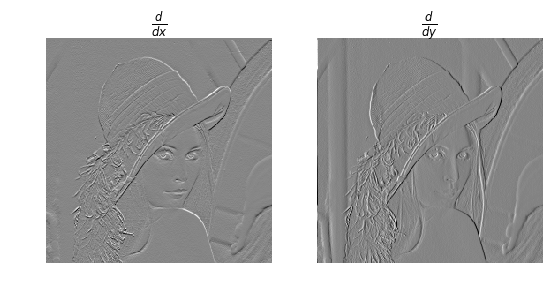

PyObject <matplotlib.text.Text object at 0x00000000259F9D68>

In [60]:
imageplot(v[:,:,1], L"\frac{d}{dx}", (1,2,1))
imageplot(v[:,:,2], L"\frac{d}{dy}", (1,2,2))

One can display its magnitude $\norm{(\nabla x)_i}$, which is large near edges.

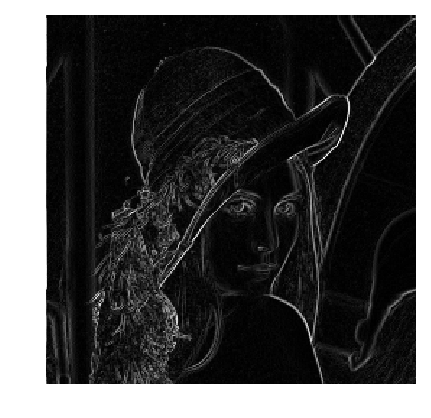

In [72]:
imageplot(sqrt(sum(v .* v, 3))[:, :])

The divergence operator maps vector field to images. 
For continuous vector fields \(v(s) \in \RR^2\), it is defined as
$$\text{div}(v)(s) = \pd{v_1(s)}{s_1} +  \pd{v_2(s)}{s_2} \in \RR.$$
(note that here, the variable \(s\) denotes the 2-D spacial position).
It is minus the adjoint of the gadient, i.e. $\text{div} = - \nabla^*$.

It is discretized, for $v=(v^1,v^2)$ as
$$\text{div}(v)_i = v^1_{i_1+1,i_2} - v^1_{i_1,i_2} + v^2_{i_1,i_2+1} - v^2_{i_1,i_2} .$$

In [107]:
diiv = v -> [v[2:end, :, 1]; v[1, :, 1]'] - v[:, :, 1] + [v[:, 2:end, 2] v[:, 1, 2]] - v[:, :, 2] # Pour ne pas avoir conflit avec la fonction div de Julia.

(::#97) (generic function with 1 method)

The Laplacian operatore is defined as $\Delta=\text{div} \circ  \nabla = -\nabla^* \circ \nabla$.
It is thus a negative symmetric operator.

In [108]:
delta = x -> diiv(grad(x))

(::#99) (generic function with 1 method)

Display $\Delta x_0$.

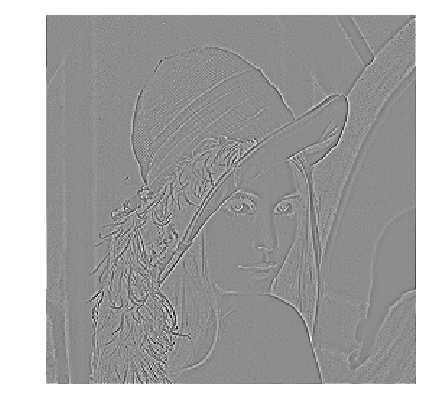

In [109]:
imageplot(delta(x0))

Check that the relation $\norm{\nabla x} = - \dotp{\Delta x}{x}.$

In [110]:
print("Should be 0:\n", sum(grad(x0) .* grad(x0)) + sum(delta(x0) .* x0) )

Should be 0:
0.0

## Gradient Descent in Image Processing

We consider now the problem of denoising an image $y \in \RR^d$ where $d = n \times n$ is the number of pixels ($n$ being the number of rows/columns in the image).

Add noise to the original image, to simulate a noisy image.

In [111]:
sigma = 0.1
y = x0 + sigma .* randn(n,n)

256×256 Array{Float64,2}:
 0.718972    0.444416    0.746524   …   0.758591     0.609853   0.456798 
 0.759693    0.785713    0.662957       0.749203     0.6832     0.621616 
 0.696291    0.747867    0.703654       0.587607     0.625304   0.316288 
 0.632332    0.688774    0.775771       0.435205     0.386099   0.0911364
 0.555677    0.680095    0.576681       0.204004     0.274192   0.307472 
 0.628196    0.681113    0.789011   …   0.199443     0.406916   0.204921 
 0.821381    0.850875    0.531524      -0.04106      0.194607   0.23857  
 0.733043    0.617572    0.70691        0.00211681   0.456111   0.0762697
 0.604894    0.802045    0.667943       0.0144936    0.297718   0.217743 
 0.66538     0.555125    0.672362       0.135864     0.110177   0.347792 
 0.674756    0.71345     0.654119   …   0.0184362    0.155926   0.186853 
 0.693967    0.890588    0.884158       0.095041     0.0521697  0.0938717
 0.707922    0.650971    0.762198       0.158227     0.17514    0.17733  
 ⋮          

Display the noisy image $y$.

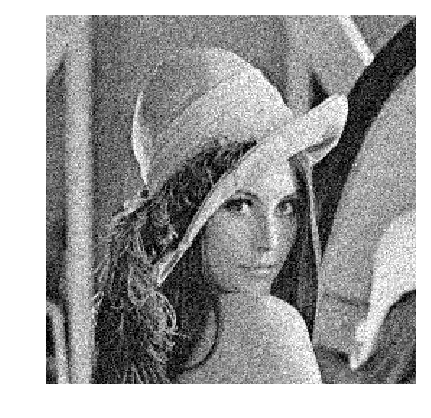

In [112]:
imageplot(clamP(y))

Denoising is obtained by minimizing the following functional
$$\umin{x \in \RR^d} f(x) = \frac{1}{2} \norm{y-x}^2 + \la J_\epsilon(x)$$
where $J_\epsilon(x)$ is a smoothed total variation of the image.
$$J_\epsilon(x) = \sum_i \norm{ (G x)_i }_{\epsilon}$$
where $(Gx)_i \in \RR^2$ is an approximation of the gradient of $x$ at pixel $i$ and for $u \in \RR^2$, we use the following smoothing of the $L^2$ norm in $\RR^2$
$$\norm{u}_\epsilon = \sqrt{ \epsilon^2 + \norm{u}^2 },$$
for a small value of $\epsilon>0$.

The gradient of the functional read
$$\nabla f(x) = x-y + \lambda \nabla J_\epsilon(x)$$
where the gradient of the smoothed TV norm is
$$\nabla J_\epsilon(x)_i = G^*( u ) \qwhereq u_i = \frac{ (G x)_i }{\norm{ (G x)_i }_\epsilon} $$
where $G^*$ is the adjoint operator of $G$ which corresponds to minus a discretized divergence

Value for $\lambda$.

In [113]:
la = 0.3 / 5

0.06

Value for $\epsilon$.

In [114]:
epsilon = 1e-3

0.001

TV norm.

In [115]:
norm_eps = u -> sqrt(eps^2 + sum(u .* u, 3))
J = x -> sum(sum(norm_eps(grad(x))))

(::#103) (generic function with 1 method)

Function $f$ to minimize.

In [116]:
f = x -> 1/2 ^ norm(x - y)^2 + la .* J(x)

(::#105) (generic function with 1 method)

Gradient of $J_\epsilon$. Note that |div| implement $-G^*$.

In [117]:
normalize_vec = (u, epsilon) -> u ./ repeat(reshape(NormEps(u,epsilon), (1, 1, 2)), inner = [size(NormEps(u,epsilon))[1], size(NormEps(u,epsilon))[2], 1])
gradTV = x -> - divergence(normalize_vec(grad(x)))

(::#109) (generic function with 1 method)

Gradient of the functional.

In [118]:
Gradf = x -> x - y + la .* gradTV(x)

(::#111) (generic function with 1 method)

The step size should satisfy
$$0 < \tau_k < \frac{2}{ 1 + 4 \lambda / \epsilon }.$$
Here we use a slightly larger step size, which still work in practice.

In [119]:
tau = 1.8/( 1 + la*8/epsilon )
tau = tau*4

0.01496881496881497

_Exercice 3:_
Implement the gradient descent. Monitor the decay of $f$ through the iterations.

In [51]:
## Insert your code here.

Display the resulting denoised image.

In [52]:
#imageplot(clamp(x))

## Constrained Optimization Using Projected Gradient Descent

We consider a linear imaging operator $\Phi : x \mapsto \Phi(x)$ that maps high resolution images to low dimensional observations.
Here we consider a pixel masking operator, that is diagonal over the spacial domain.

To emphasis the effect of the TV functional, we use a simple geometric image.

In [120]:
n = 64
radius = 0.6
t = linspace(-1,1,n)
(Y,X) = meshgrid(t,t)
x0 = (max( abs(X), abs(Y) ) .< radius) .* 1.0

64×64 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 

We consider here the inpainting problem.
This simply corresponds to a masking operator.
Here we remove the central part of the image.

In [127]:
a = 4
Lambda = ones(n, n)
Lambda[Int(n/2) - a : Int(n/2) + a, :] = 0

0

Masking operator $\Phi$.
Note that it is symmetric, i.e. $\Phi^*=\Phi$.

In [133]:
Phi  = x -> x .* Lambda
PhiS = Phi

(::#115) (generic function with 1 method)

Noiseless observations $y=\Phi x_0$.

In [134]:
y = Phi(x0)

64×64 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 

Display.

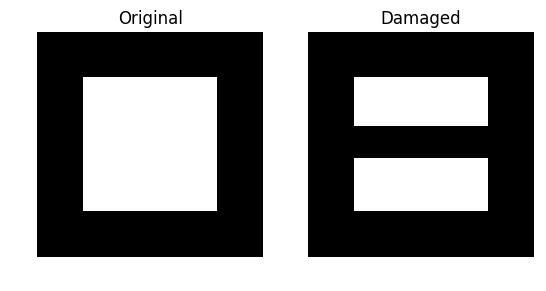

PyObject <matplotlib.text.Text object at 0x000000002679EDA0>

In [135]:
imageplot(x0, "Original", (1,2,1))
imageplot(y, "Damaged", (1,2,2))

We want to solve the noiseless inverse problem $y=\Phi f$ using a total variation regularization:
$$\umin{ y=\Phi x } J_\epsilon(x).$$
We use the following projected gradient descent
$$x^{(k+1)} = \text{Proj}_{\Hh}( x^{(k)} - \tau_k \nabla J_{\epsilon}(x^{(k)}) )$$
where $\text{Proj}_{\Hh}$ is the orthogonal projection on the set of linear constraint $\Phi x = y$, and is easy to compute for inpainting

In [136]:
ProjH = x -> x + PhiS( y - Phi(x) )

(::#117) (generic function with 1 method)

_Exercice 4:_
Display the evolution of the inpainting process.

In [59]:
## Insert your code here.

_Exercice 5:_
Try with several values of $\epsilon$.

In [60]:
## Insert your code here.